# <font color =red>Netflix EDA</font>

### About The dataset

#### *The dataset we will use in this protect is titles.csv, which includes following 15 columns:*
* **id**: The title ID on JustWatch.
* **title**: The name of the title.
* **show_type**: TV show or movie.
* **description**: A brief description.
* **release_year**: The release year.
* **age_certification**: The age certification.
* **runtime**: The length of the episode (SHOW) or movie.
* **genres**: A list of genres.
* **production_countries**: A list of countries that produced the title.
* **seasons**: Number of seasons if it's a SHOW.
* **imdb_id**: The title ID on IMDB.
* **imdb_score**: Score on IMDB.
* **imdb_votes**: Votes on IMDB.
* **tmdb_popularity**: Popularity on TMDB.
* **tmdb_score**: Score on TMDB.

In [307]:
##loading the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [308]:
%matplotlib inline
pd.set_option('display.max_columns',None)

In [309]:
df=pd.read_csv("titles.csv")
df.head

<bound method NDFrame.head of              id                                      title   type  \
0      ts300399        Five Came Back: The Reference Films   SHOW   
1       tm84618                                Taxi Driver  MOVIE   
2      tm154986                                Deliverance  MOVIE   
3      tm127384            Monty Python and the Holy Grail  MOVIE   
4      tm120801                            The Dirty Dozen  MOVIE   
...         ...                                        ...    ...   
5845  tm1014599                                  Fine Wine  MOVIE   
5846   tm898842                                C/O Kaadhal  MOVIE   
5847  tm1059008                                    Lokillo  MOVIE   
5848  tm1035612  Dad Stop Embarrassing Me - The Afterparty  MOVIE   
5849   ts271048         Mighty Little Bheem: Kite Festival   SHOW   

                                            description  release_year  \
0     This collection includes 12 World War II-era p...          194

In [310]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

#### We don't require the description,imdb_id,id columns so we drop them

In [311]:
df.drop(columns={"description","imdb_id","id"},inplace=True)

In [312]:
df.head()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",['US'],NaN,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,7.7,72662.0,20.398,7.600


In [313]:
df.shape

(5850, 12)

we have **12** columns and **5850** rows 

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5849 non-null   object 
 1   type                  5850 non-null   object 
 2   release_year          5850 non-null   int64  
 3   age_certification     3231 non-null   object 
 4   runtime               5850 non-null   int64  
 5   genres                5850 non-null   object 
 6   production_countries  5850 non-null   object 
 7   seasons               2106 non-null   float64
 8   imdb_score            5368 non-null   float64
 9   imdb_votes            5352 non-null   float64
 10  tmdb_popularity       5759 non-null   float64
 11  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 548.6+ KB


In [315]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


In [316]:
missing_no=df.isna().sum()

In [317]:
df.duplicated().sum()

0

In [318]:
for i in range(len(missing_no)):
      if missing_no[i] > 0:
            print('missing value rate in {} column = {}%'.format(df.columns[i],missing_no[i]/len(df)*100))

missing value rate in title column = 0.017094017094017096%
missing value rate in age_certification column = 44.76923076923077%
missing value rate in seasons column = 64.0%
missing value rate in imdb_score column = 8.23931623931624%
missing value rate in imdb_votes column = 8.512820512820513%
missing value rate in tmdb_popularity column = 1.5555555555555556%
missing value rate in tmdb_score column = 5.316239316239316%


**We can see that most of the missing values is in the age certification and seasons column**

**There is very small number of missing values in titles column so we can remove it completely as it will not effect the data as much**

In [319]:
df = df[~df["title"].isnull()]

**By digging through the data and some external searching I found that he dataset includes all age ratings from the Netflix age rating list, with missing values indicating unrated movies or shows.**

In [320]:
print(df["age_certification"].unique())
df["age_certification"].fillna("Not Rated",inplace=True)

['TV-MA' 'R' 'PG' nan 'TV-14' 'PG-13' 'TV-PG' 'TV-Y' 'TV-G' 'TV-Y7' 'G'
 'NC-17']


In [321]:
df[df["seasons"].isnull()]["type"].value_counts()

MOVIE    3743
Name: type, dtype: int64

In [322]:
df["type"].value_counts()

MOVIE    3743
SHOW     2106
Name: type, dtype: int64

**As we can see that all the missing values of the season is because they are all movies**

**As Movies techically do not have seasons we can fill the missing values with 0**

In [323]:
df["seasons"].fillna(0,inplace=True)

In [324]:
df.isnull().sum()

title                     0
type                      0
release_year              0
age_certification         0
runtime                   0
genres                    0
production_countries      0
seasons                   0
imdb_score              481
imdb_votes              497
tmdb_popularity          90
tmdb_score              310
dtype: int64

In [325]:
four_col = df[["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]]
df[["imdb_score","imdb_votes","tmdb_popularity","tmdb_score"]] = four_col.apply(lambda x : x.fillna(np.mean(x)))

**Filling the remaining columns with their average values**

In [326]:
df.isnull().sum()

title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

**As we can see now we have dealt with missing walues in the dataset**

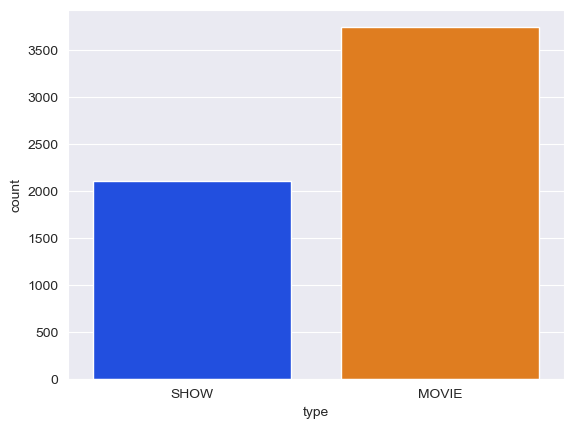

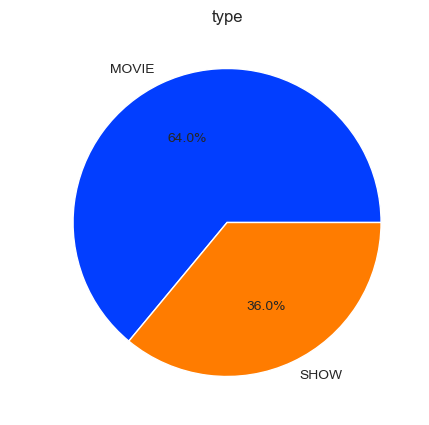

In [327]:
sns.set_palette("bright")
sns.countplot(data=df,x=df['type'])
fig = plt.figure(figsize=(5,5))
df['type'].value_counts().plot(kind='pie',autopct='%.1f%%')
plt.ylabel(" ",fontsize=15)
plt.title("type")
print("")

**Converting the year colummn to time series data so we can analyze it**

In [328]:
df['release_year']=pd.to_datetime(df.release_year,format='%Y')
df['release_year']=pd.DatetimeIndex(df['release_year']).year

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5849
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5849 non-null   object 
 1   type                  5849 non-null   object 
 2   release_year          5849 non-null   int64  
 3   age_certification     5849 non-null   object 
 4   runtime               5849 non-null   int64  
 5   genres                5849 non-null   object 
 6   production_countries  5849 non-null   object 
 7   seasons               5849 non-null   float64
 8   imdb_score            5849 non-null   float64
 9   imdb_votes            5849 non-null   float64
 10  tmdb_popularity       5849 non-null   float64
 11  tmdb_score            5849 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 594.0+ KB


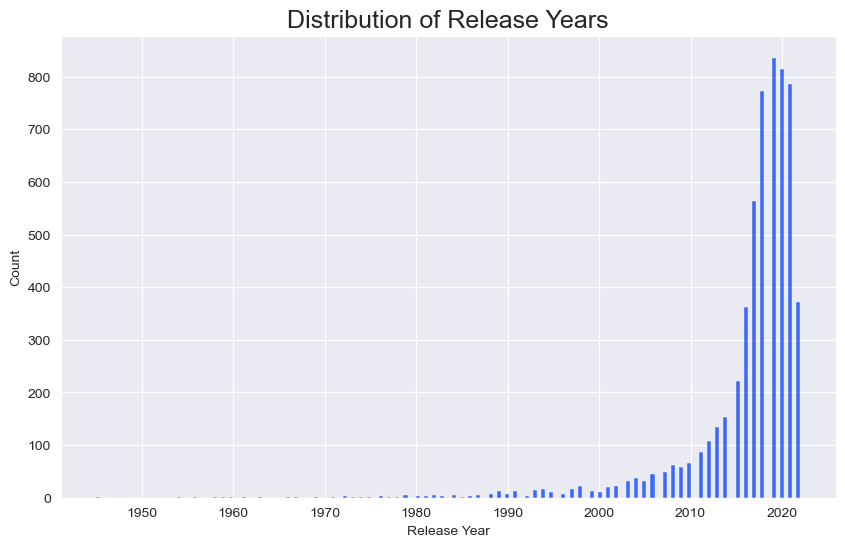

In [330]:
plt.figure(figsize=(10, 6))

sns.set_style("darkgrid")
colors = sns.color_palette("viridis", n_colors=10)

sns.histplot(data=df, x="release_year", kde=False, palette=colors)

plt.title("Distribution of Release Years", size=18)
plt.xlabel("Release Year")
plt.ylabel("Count")

plt.show()

**Some insights from the plot**

* We can see that the content was growing in both movies and in tv shows till 2019
* We can see a clear dip in addition of new content after 2019. This correlatres to the scnerio in the world at that time as we were under a global pandemic and people were forced to isolate so the content production hault during that time


In [331]:
##Longest Movie

long_df=df[df['type']=='MOVIE']
longest=long_df[['title','runtime']].sort_values('runtime',ascending=False)[:1]
print(f'longest Movie:\n {longest}\n')

longest Movie:
               title  runtime
923  Bonnie & Clyde      240



In [332]:
long_df.loc[[923]]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
923,Bonnie & Clyde,MOVIE,2013,PG-13,240,"['drama', 'crime', 'european']",['AT'],0.0,6.510861,23439.382474,0.933,7.5


In [333]:
##Shortest Movie

short_df=df[df['type']=='MOVIE']
shortest=short_df[['title','runtime']].sort_values('runtime')[:1]
print(f'Shortest Movie:\n{shortest}\n')

Shortest Movie:
              title  runtime
5766  Time to Dance        2



In [334]:
short_df.loc[[5766]]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5766,Time to Dance,MOVIE,2021,Not Rated,2,"['romance', 'drama']",['IN'],0.0,2.2,963.0,1.043,4.0


**So the longest movie here in the data set is Bonnie & Clyde with 240 minutes of runtime and shortest is Time To Dance with 2 minutes of runtime**

In [335]:
df[df['seasons']!='NaN'].sort_values(('seasons'),ascending=False)[:1]

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
91,Survivor,SHOW,2000,TV-PG,48,['reality'],['US'],42.0,7.4,24687.0,54.19,7.4


**The show with most number of seasons is Survivor which has a whopping 42 seasons**

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 5849
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5849 non-null   object 
 1   type                  5849 non-null   object 
 2   release_year          5849 non-null   int64  
 3   age_certification     5849 non-null   object 
 4   runtime               5849 non-null   int64  
 5   genres                5849 non-null   object 
 6   production_countries  5849 non-null   object 
 7   seasons               5849 non-null   float64
 8   imdb_score            5849 non-null   float64
 9   imdb_votes            5849 non-null   float64
 10  tmdb_popularity       5849 non-null   float64
 11  tmdb_score            5849 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 594.0+ KB


In [337]:
country_counts = df["production_countries"].apply(pd.Series).stack().value_counts().reset_index()
country_counts.columns = ["Country", "Count"]

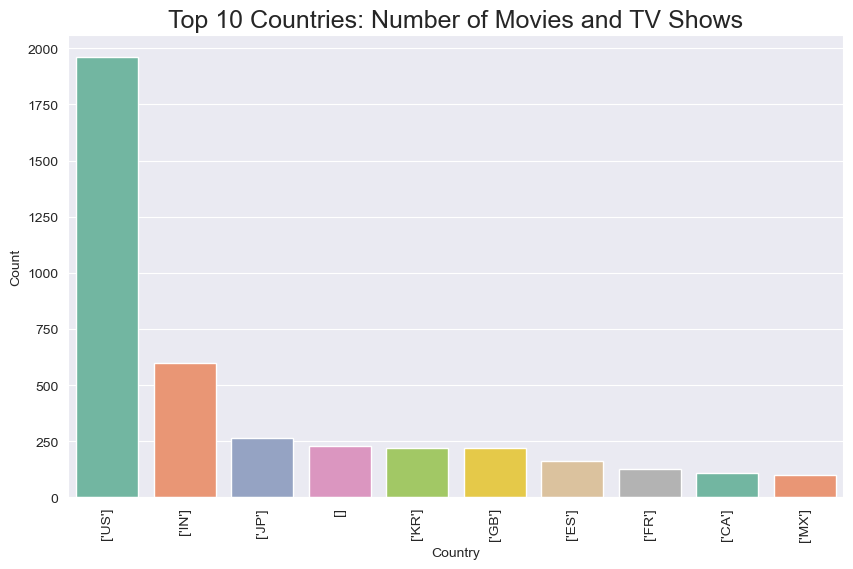

In [338]:
top_10_countries = country_counts.head(10)

# Plot the top 10 country counts using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_countries, x="Country", y="Count", palette="Set2")
plt.title("Top 10 Countries: Number of Movies and TV Shows", size=18)
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

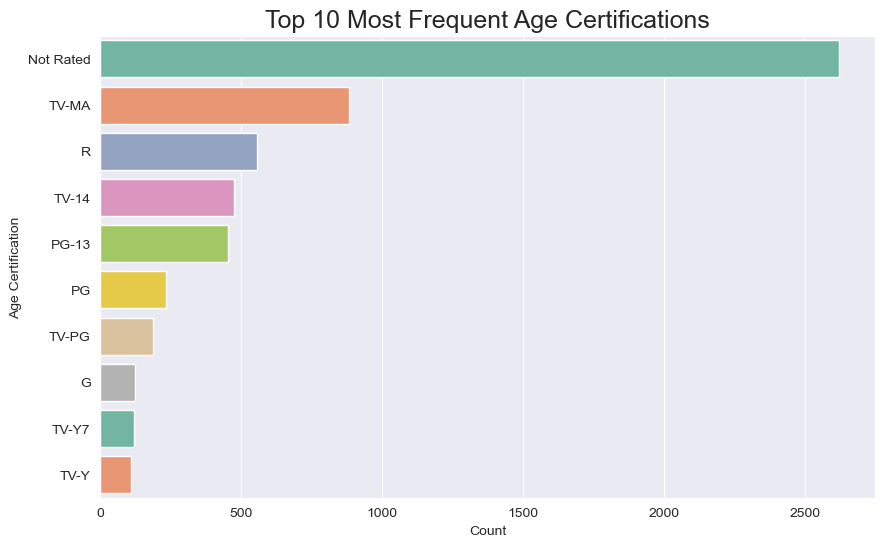

In [339]:
top_10_certifications = df["age_certification"].value_counts().head(10)

plt.figure(figsize=(10, 6))

sns.barplot(x=top_10_certifications.values, y=top_10_certifications.index, palette="Set2")

plt.title("Top 10 Most Frequent Age Certifications", size=18)
plt.xlabel("Count")
plt.ylabel("Age Certification")

plt.show()

In [340]:
df['genres']

0                                 ['documentation']
1                                ['drama', 'crime']
2       ['drama', 'action', 'thriller', 'european']
3                   ['fantasy', 'action', 'comedy']
4                                 ['war', 'action']
                           ...                     
5845                           ['romance', 'drama']
5846                                      ['drama']
5847                                     ['comedy']
5848                                             []
5849              ['family', 'animation', 'comedy']
Name: genres, Length: 5849, dtype: object

**Thera are multiple generas for one single movie or tv show we don't want that,so I would like to split them into single genres and count them.**

In [341]:
genrescount = list()
df.genres.str.findall(r"'(\w+?)'").map(lambda x: genrescount.extend(x))
top_10_genres = pd.Series(genrescount).value_counts()[:10]

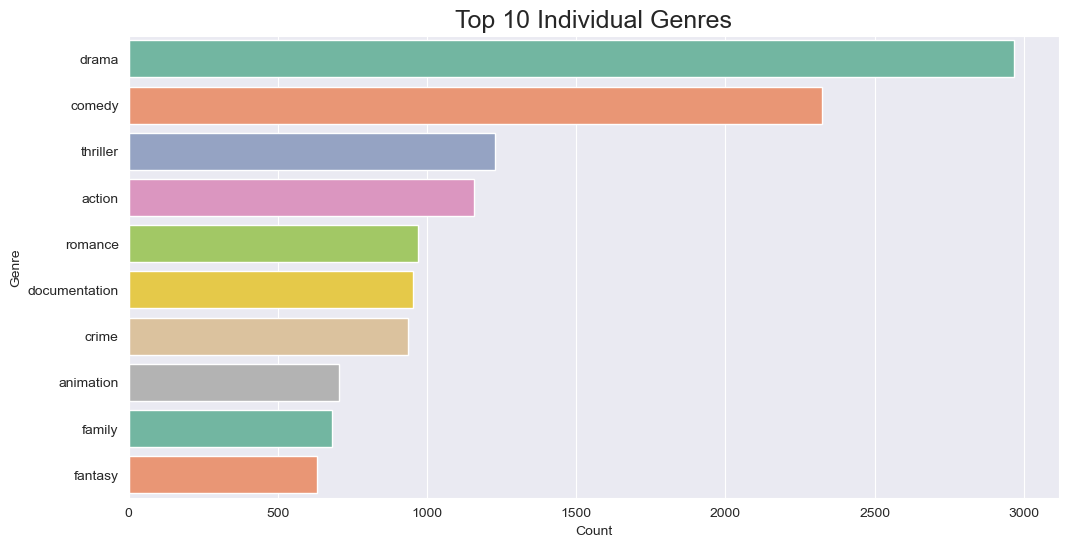

In [342]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette="Set2")
plt.title("Top 10 Individual Genres", size=18)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

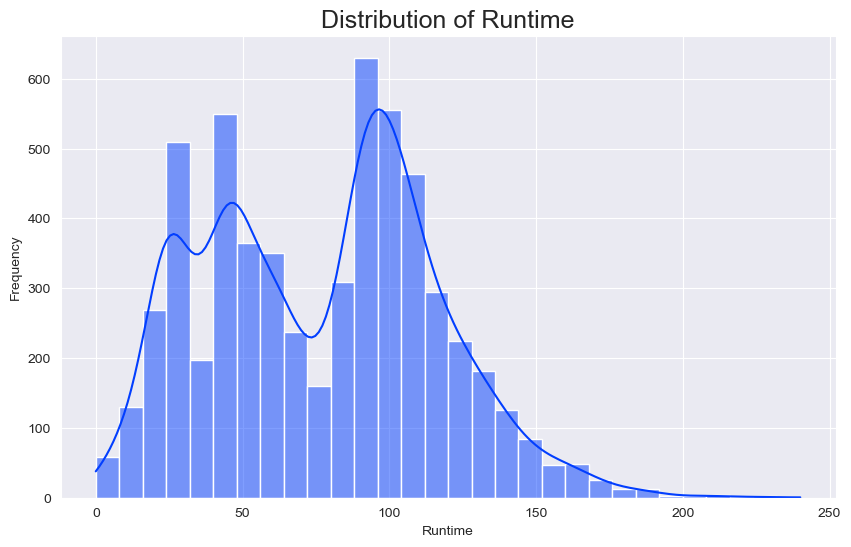

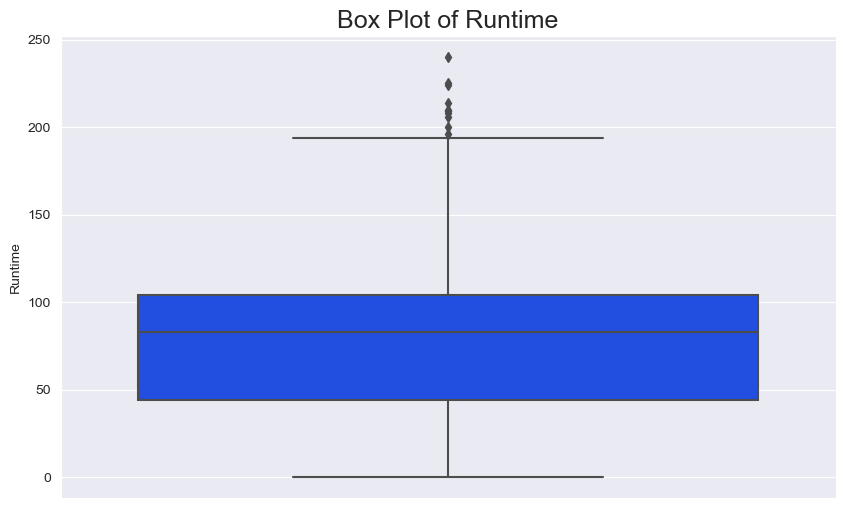

In [343]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="runtime", bins=30, kde=True)
plt.title("Distribution of Runtime", size=18)
plt.xlabel("Runtime")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y="runtime")
plt.title("Box Plot of Runtime", size=18)
plt.ylabel("Runtime")
plt.show()

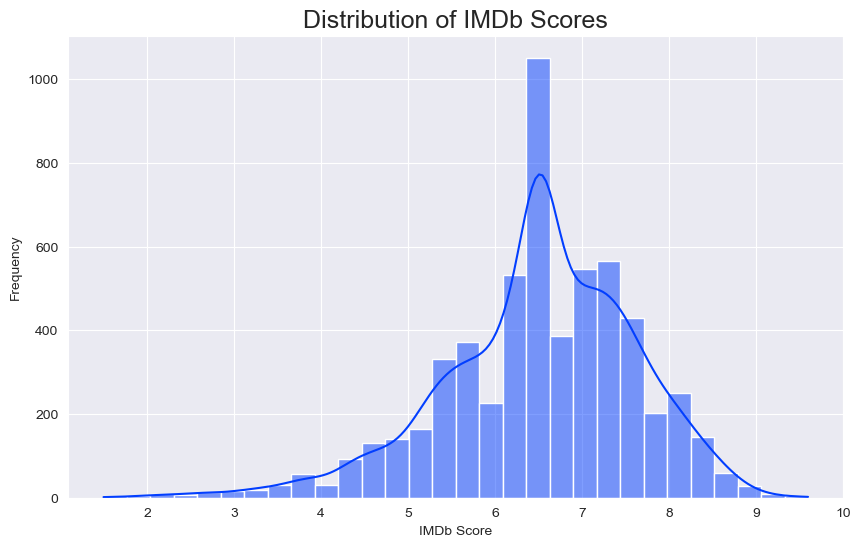

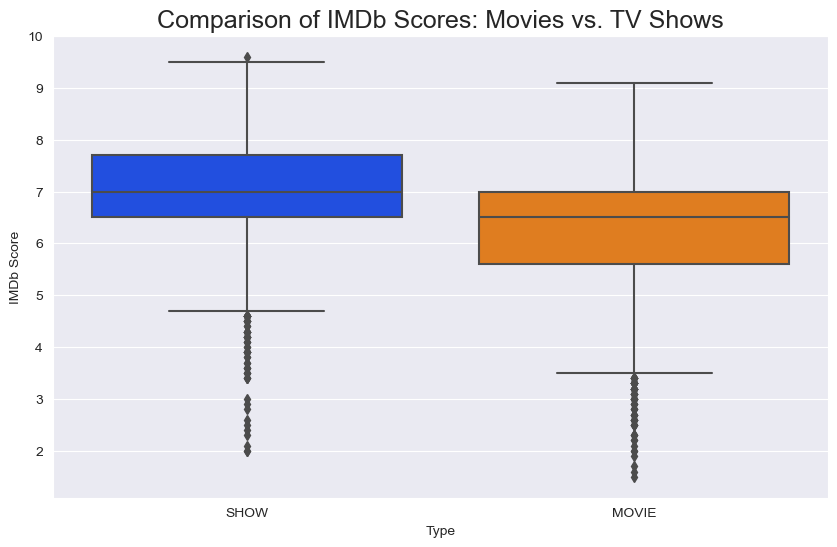

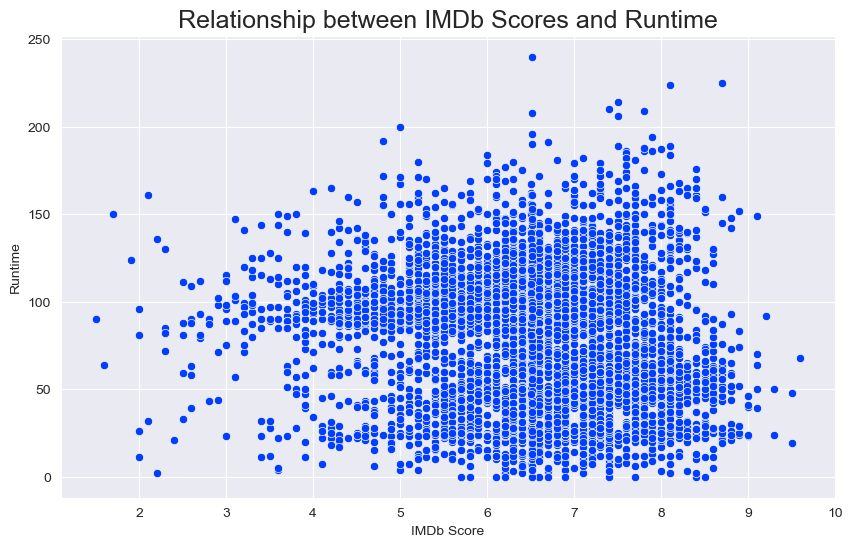

In [344]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="imdb_score", bins=30, kde=True)
plt.title("Distribution of IMDb Scores", size=18)
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()

# Compare IMDb scores between movie and TV show types
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="type", y="imdb_score")
plt.title("Comparison of IMDb Scores: Movies vs. TV Shows", size=18)
plt.xlabel("Type")
plt.ylabel("IMDb Score")
plt.show()

# Analyze the relationship between IMDb scores and runtime
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="imdb_score", y="runtime")
plt.title("Relationship between IMDb Scores and Runtime", size=18)
plt.xlabel("IMDb Score")
plt.ylabel("Runtime")
plt.show()